## Python

In [1]:
from source.python.insertion_sort import insertion_sort_inc, insertion_sort_dec
import random

In [2]:
def asses_inc(sorting_algorithm, arr: list[int]):
    assert sorting_algorithm(arr) == sorted(arr)
    
def asses_dec(sorting_algorithm, arr: list[int]):
    assert sorting_algorithm(arr) == sorted(arr, reverse=True)
    

In [3]:
size = 10**4
arr = [random.randint(a=0, b=1000) for _ in range(size)]

In [4]:
asses_inc(insertion_sort_inc, arr)

In [5]:
asses_dec(insertion_sort_dec, arr)

## C

In [6]:
from ctypes import *

path = "/home/rbuntu/Grath/CLRS/Chapter2/source/CDLL/insertion_sort.so"
libc = CDLL(path)

In [7]:
insertion_sort_c_incc = libc.insertion_sort_inc
insertion_sort_c_incc.restype = None

In [8]:
insertion_sort_c_decc = libc.insertion_sort_dec
insertion_sort_c_decc.restype = None

In [9]:
def insertion_sort_c_py(arr, v: int = 0):
    """
    Insertion sort wrapper for python. See `Note`
    
    `Note`:
    The C function does not allocate the memory for the return type, but python does, therefore
    the C function does the operations in place on a local python copy of the data, this approach
    is safer as the python's garbage collector is responsible for cleaning the allocated data passed to C function.
    If we would like to allocate memory in C and return the pointer to allocated memory we would also have to deallocate it.
    """
    arr_type = c_int * len(arr)
    arr_c = arr_type(*arr)
    if v == 0:
        insertion_sort_c_incc(pointer(arr_c), len(arr))
    else:
        insertion_sort_c_decc(pointer(arr_c), len(arr))

    return list(arr_c)

In [10]:
from functools import partial

In [11]:
## Creating partial functions in order to 
insertion_sort_c_dec = partial(insertion_sort_c_py, v=1)
insertion_sort_c_inc = partial(insertion_sort_c_py, v=0)

In [12]:
asses_inc(insertion_sort_c_inc, arr)

In [13]:
asses_dec(insertion_sort_c_dec, arr)

## C vs Python Comparison

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})

In [71]:
# %%timeit
# insertion_sort_c_inc(arr)

In [72]:
# %%timeit
# insertion_sort_inc(arr)

In [73]:
functions = {'insertion_sort_c': insertion_sort_c_inc, 'insertion_sort_py': insertion_sort_inc}

In [74]:
import time
from typing import Callable
def measure_times(functions: list[Callable[[list[int]], list[int]]], sizes: list[int], samples: int = 1):
    assert samples > 0, "Sample size must be and integer greater than zero"

    function_dictionary = dict([(function, []) for function in functions])

    for size in sizes:
        arrs = [[random.randint(0, 1000) for _ in range(size)] for _ in range(samples)]

        for function in functions:
            start = time.time()
            for arr in arrs:
                sorted_arr = functions[function](arr)
            total_time = time.time() - start
            function_dictionary[function].append(total_time / samples)
    
    return function_dictionary



In [42]:
sizes = list(range(500, 10001, 500))

In [43]:
results = measure_times(functions, sizes, samples=5)

In [45]:
## The trend fo r
df = pd.DataFrame(results, sizes).rename_axis(index='N')

In [46]:
df

,insertion_sort_c,insertion_sort_py
N,,
500,0.000400,0.003290
1000,0.000375,0.013855
1500,0.000664,0.031449
2000,0.001014,0.056247
2500,0.001445,0.090886
3000,0.001922,0.130775
3500,0.002479,0.177171
4000,0.003137,0.232252
4500,0.003794,0.289606


In [47]:
df['C_relative_speed_advantage'] =  df.insertion_sort_py / df.insertion_sort_c

In [48]:
df

,insertion_sort_c,insertion_sort_py,C_relative_speed_advantage
N,,,
500,0.000400,0.003290,8.217697
1000,0.000375,0.013855,36.976584
1500,0.000664,0.031449,47.340009
2000,0.001014,0.056247,55.473382
2500,0.001445,0.090886,62.876097
3000,0.001922,0.130775,68.026143
3500,0.002479,0.177171,71.477569
4000,0.003137,0.232252,74.029152
4500,0.003794,0.289606,76.324046


[]

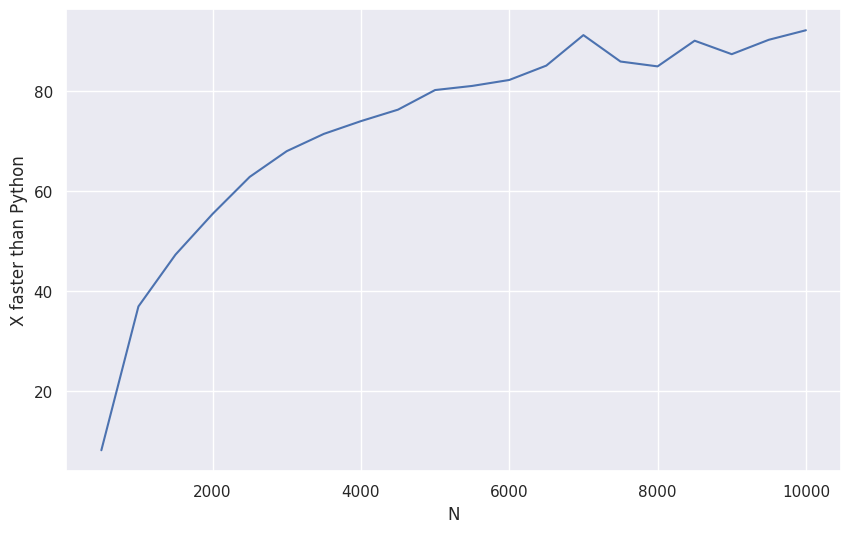

In [75]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df.C_relative_speed_advantage)
ax.set(ylabel='X faster than Python')
plt.plot()

[]

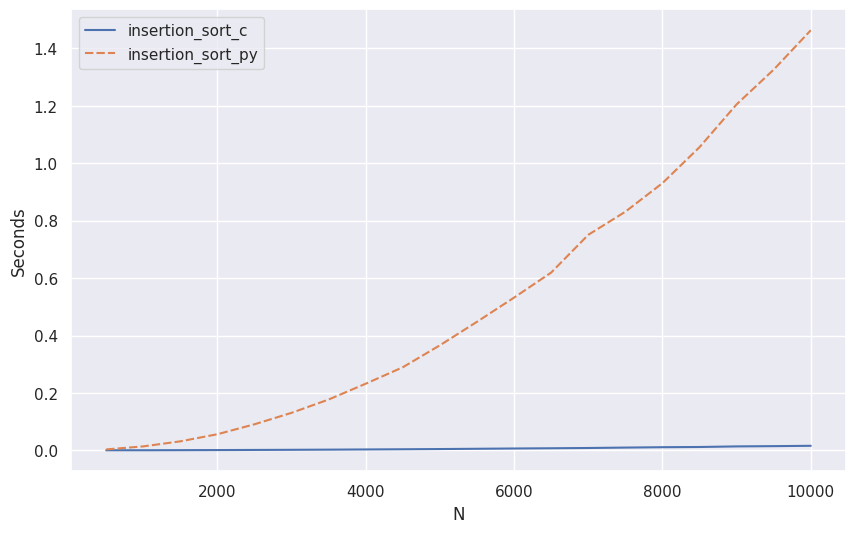

In [76]:
ax = sns.lineplot(data=df.iloc[:, :2])
ax.set(ylabel='Seconds')
plt.plot()

[]

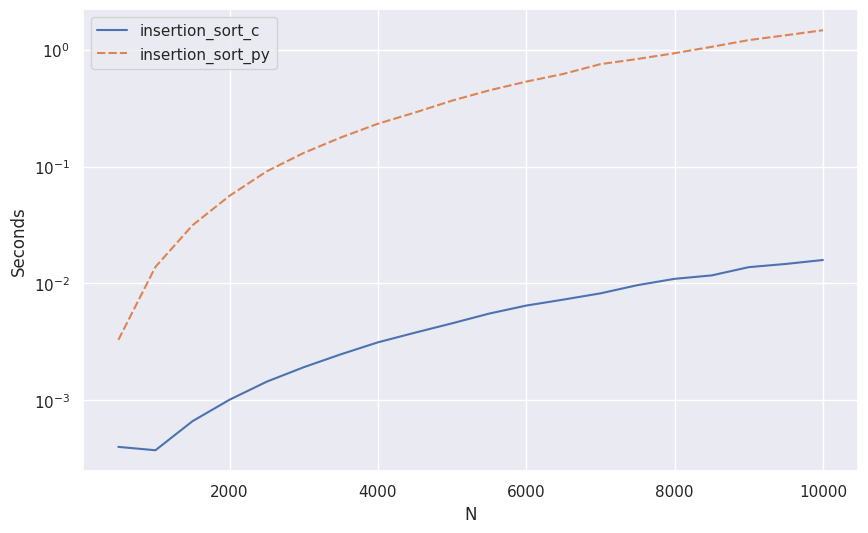

In [78]:
## Due to the vast difference in scales between two languages it is wiser to user a log scale to see the difference between two implementations
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df.iloc[:, :2])
ax.set(ylabel='Seconds')
plt.yscale('log')
plt.plot()